# Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/zillow.csv"
df = pd.read_csv(url, index_col=0)

In [3]:
# don't worry about this step for now, it's just to fix extra "" in the columns names from the data source
df.columns = [ x[2:-1] for x in df.columns ]

In [4]:
df

,Living Space (sq ft),Beds,Baths,Zip,Year,List Price ($)
Index,,,,,,
1,2222,3,3.5,32312,1981,250000
2,1628,3,2.0,32308,2009,185000
3,3824,5,4.0,32312,1954,399000
4,1137,3,2.0,32309,1993,150000
5,3560,6,4.0,32309,1973,315000
6,2893,4,3.0,32312,1994,699000
7,3631,4,3.0,32309,1996,649000
8,2483,4,3.0,32312,2016,399000
9,2400,4,4.0,32312,2002,613000


In [5]:
df.groupby('Beds')['List Price ($)'].mean()

Beds
2     89000.000000
3    220428.571429
4    501142.857143
5    553450.000000
6    315000.000000
Name: List Price ($), dtype: float64

<AxesSubplot:xlabel='Living Space (sq ft)', ylabel='List Price ($)'>

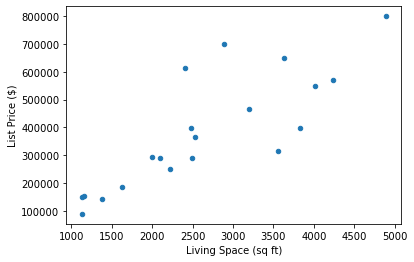

In [6]:
df.plot.scatter(x="Living Space (sq ft)", y="List Price ($)")

# Scikit-learn

## Example 1

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

X = df[["Living Space (sq ft)"]].values
X

array([[2222],
       [1628],
       [3824],
       [1137],
       [3560],
       [2893],
       [3631],
       [2483],
       [2400],
       [1997],
       [2097],
       [3200],
       [4892],
       [1128],
       [1381],
       [4242],
       [2533],
       [1158],
       [2497],
       [4010]])

In [9]:
y = df["List Price ($)"].values
y

array([250000, 185000, 399000, 150000, 315000, 699000, 649000, 399000,
       613000, 295000, 290000, 465000, 799900,  89000, 143000, 569000,
       365000, 155000, 289000, 549900])

In [10]:
reg.fit(X, y)

reg.coef_

array([151.97213992])

In [11]:
ls_min = df["Living Space (sq ft)"].min()
ls_max = df["Living Space (sq ft)"].max()

print(ls_min, ls_max)

1128 4892


In [12]:
x_vals = [ [x] for x in list(range(1000, 5000)) ]


In [13]:
pred = reg.predict( x_vals )
pred

array([133347.04793344, 133499.02007336, 133650.99221329, ...,
       740779.6912112 , 740931.66335112, 741083.63549105])

In [14]:
res_df = pd.DataFrame( data = list( zip([x[0] for x in x_vals], pred) ), columns=["Living_space (sq ft)", "predicted price"] )
res_df

,Living_space (sq ft),predicted price
0,1000,133347.047933
1,1001,133499.020073
2,1002,133650.992213
3,1003,133802.964353
4,1004,133954.936493
...,...,...
3995,4995,740475.746931
3996,4996,740627.719071
3997,4997,740779.691211
3998,4998,740931.663351


<AxesSubplot:xlabel='Living_space (sq ft)'>

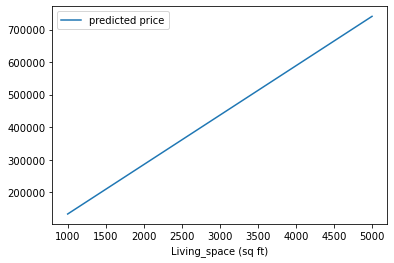

In [15]:
res_df.plot(x="Living_space (sq ft)", y="predicted price")

## Example 2

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

X = df[["Living Space (sq ft)", "Beds"]].values
y = df["List Price ($)"].values

reg.fit(X, y)
print(reg.coef_, reg.intercept_)

[   179.54393123 -38816.59840219] 57873.502186312806
